### Comparison Plots with pairplot() and jointplot()

**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (14, 7)
plt.style.use('ggplot')

# for Interactive Shells
from IPython.display import display

**The Data**

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### jointplot

jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins. This plot is a convenience class that wraps JointGrid. 'hex' bins the data into hexagons with histograms in the margins

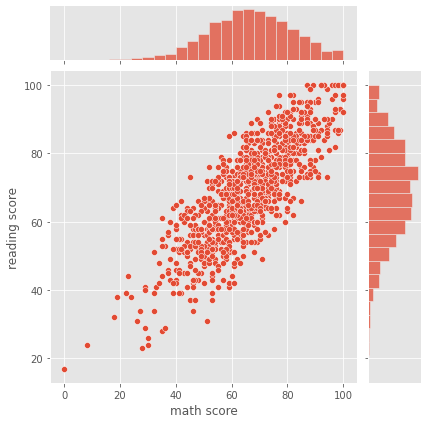

In [5]:
sns.jointplot(x='math score',y='reading score',data=df)

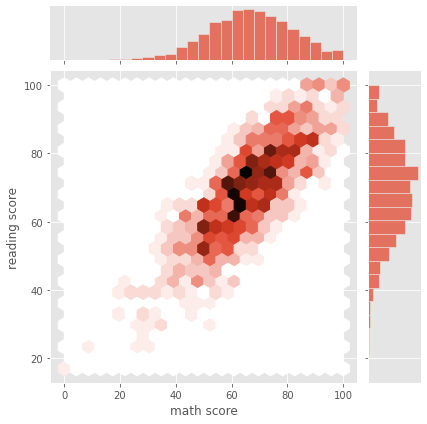

In [6]:
sns.jointplot(x='math score',y='reading score',data=df,kind='hex')

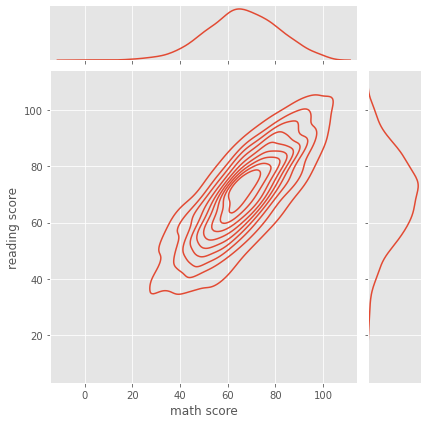

In [7]:
sns.jointplot(x='math score',y='reading score',data=df,kind='kde')

### pairplot

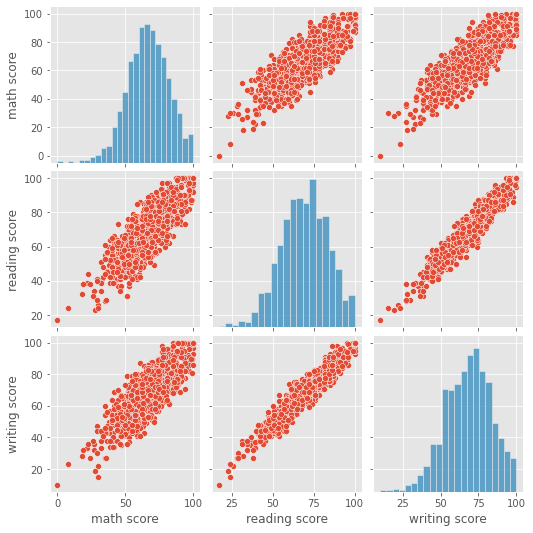

In [8]:
sns.pairplot(df)

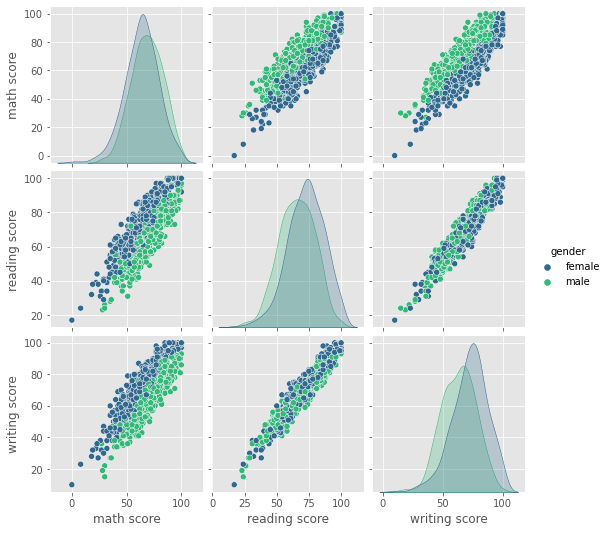

In [9]:
sns.pairplot(df,hue='gender',palette='viridis')

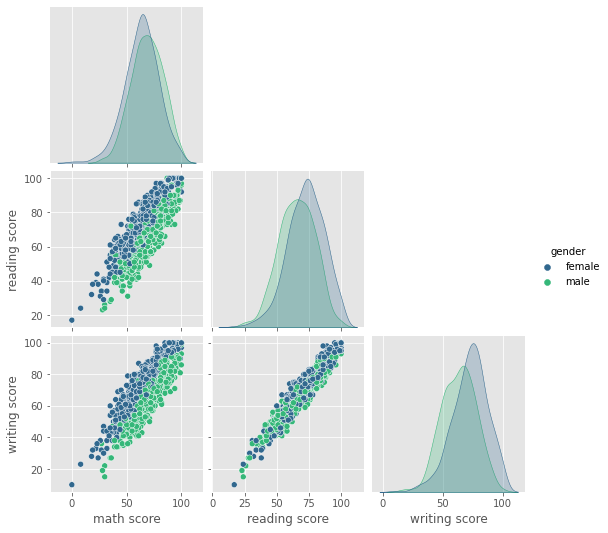

In [10]:
sns.pairplot(df,hue='gender',palette='viridis',corner=True)

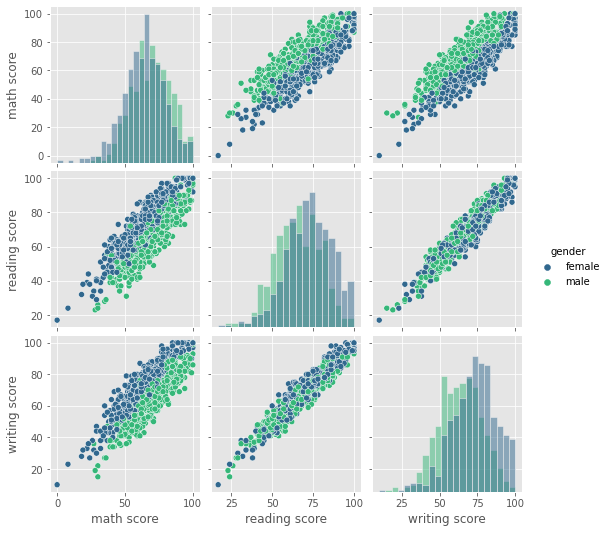

In [11]:
sns.pairplot(df,hue='gender',palette='viridis',diag_kind='hist')

## Grid Plot

Grids are general types of plots that allow you to map plot types to grid rows and columns, which helps you to create similar character-separated plots.

**catplot**

Catplot is a relatively new addition to Seaborn that simplifies plotting that involves categorical variables.

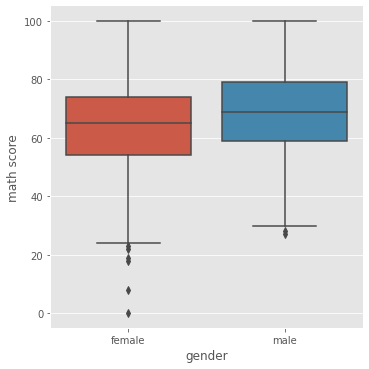

In [12]:
# Kind Options are: “point”, “bar”, “strip”, “swarm”, “box”, “violin”, or “boxen”
sns.catplot(x='gender',y='math score',data=df,kind='box')

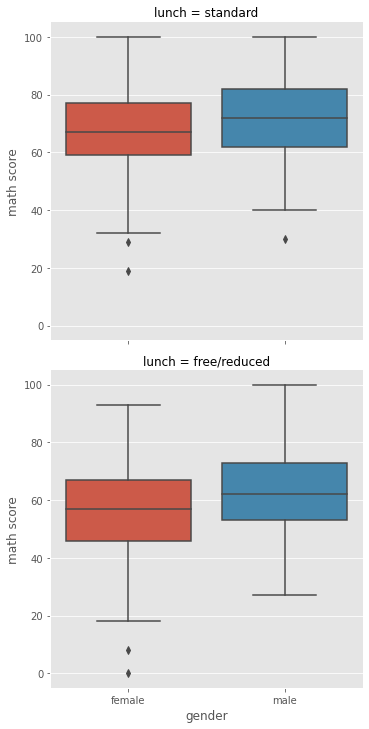

In [13]:
sns.catplot(x='gender',y='math score',data=df,kind='box',row='lunch')

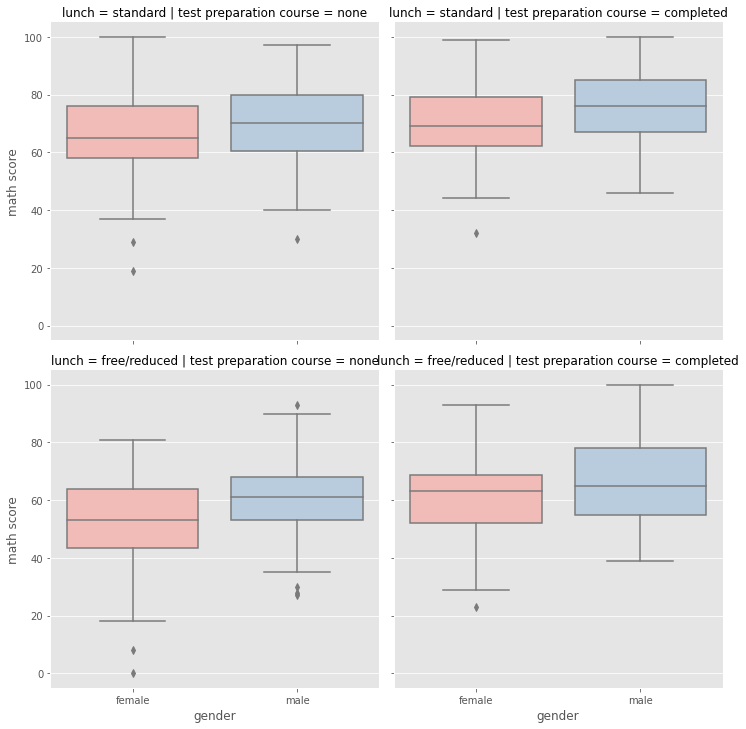

In [14]:
sns.catplot(x='gender',y='math score',data=df,kind='box',row='lunch',col='test preparation course',palette='Pastel1')

**Pairgrid**

Grid that pairplot is built on top of, allows for heavy customization of the pairplot seen earlier.

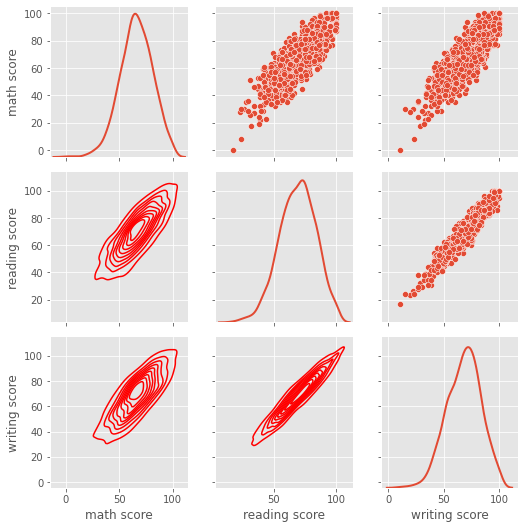

In [15]:
g = sns.PairGrid(df,palette='magma')
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot, lw=2)
g = g.map_lower(sns.kdeplot, colors="red")

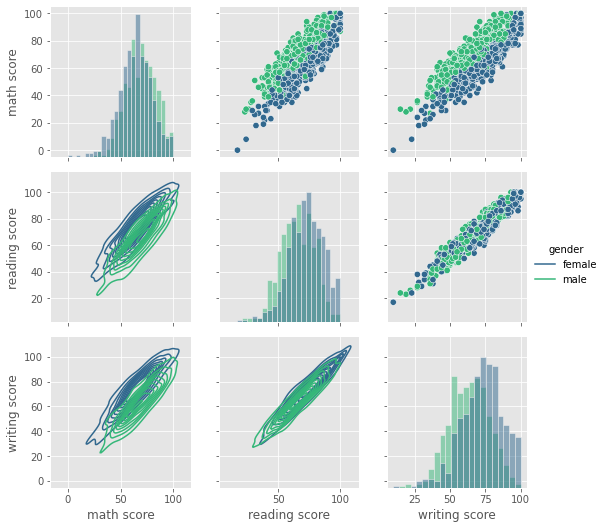

In [18]:
g = sns.PairGrid(df, hue="gender", palette="viridis",hue_kws={"marker": ["o", "+"]})
g = g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.histplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend()

**FacetGrid**

FacetGrid object takes a dataframe as input and the names of the variables that will form the row, column, or hue dimensions of the grid. The variables should be categorical and the data at each level of the variable will be used for a facet along that axis.

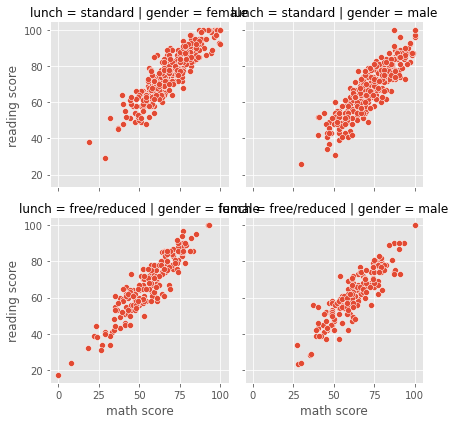

In [23]:
g = sns.FacetGrid(data=df,col='gender',row='lunch')
g = g.map(plt.scatter, "math score", "reading score", edgecolor="w")
g.add_legend()

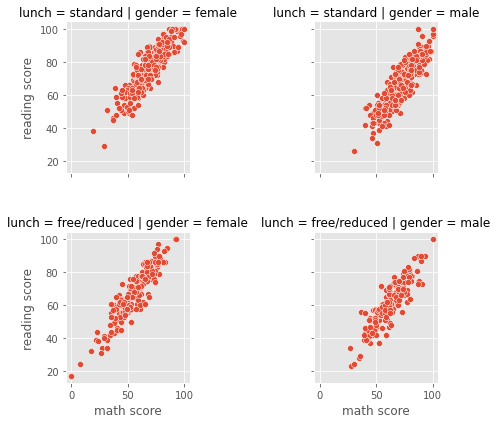

In [25]:
g = sns.FacetGrid(data=df,col='gender',row='lunch')
g = g.map(plt.scatter, "math score", "reading score", edgecolor="w")
g.add_legend()

plt.subplots_adjust(hspace=0.4, wspace=1)